In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import math

[[ 0 88 88 ...  0  0  0]
 [ 0 88 88 ...  0  0  0]
 [88 88 88 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


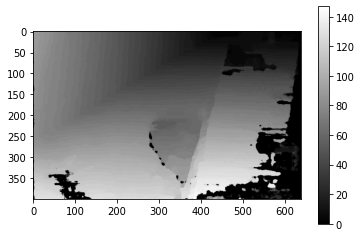

67.76289178619105


In [19]:
# disparity = np.load('depth_image_1.npy')
disparity = np.load('image_0.npy')
print(disparity)
disparity3d = np.copy(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
width1 = disparity.shape[1]
height1 = disparity.shape[0]
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_dis= sum_dis + disparity[i][j]
            disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
print(avg_dis)
d1=[]
for i in range(height1):
    for j in range(width1):
        d1.append(disparity[i][j])

# for i in range(disparity.shape[0]):
#     for j in range(disparity.shape[1]):
#         if(disparity[i][j] == 0):
#             print("a")
#             disparity[i][j] = max(d1)
# plt.imshow(disparity, "gray")
# plt.colorbar()
# plt.show()

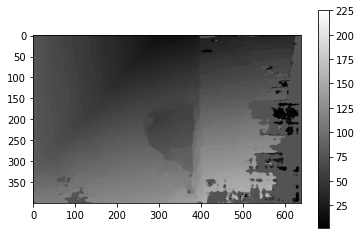

TypeError: 'builtin_function_or_method' object is not subscriptable

In [12]:
# data = statistics.mode(d)
# print(data)
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if(disparity[i][j] == 0):
            disparity[i][j] = avg_dis
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
# (thresh, disparity_bw) = cv2.threshold(disparity, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# plt.imshow(disparity_bw, "gray")
# plt.colorbar()
# plt.show()
# img_disp = np.copy(disparity)
img_disp = disparity.copy
# print(img_disp[300][300])
# print(img_disp[250][300])
# for i in range(disparity.shape[0]):
#     for j in range(disparity.shape[1]):
#         if(disparity[i][j] < 66):
#             disparity[i][j] = 1
#         else:
#             img_disp[i][j] = 0
# for i in range(disparity.shape[0]):
#     for j in range(disparity.shape[1]):
#         if(disparity[i][j] < 70):
#             img_disp[i][j] = 1
#         else:
#             img_disp[i][j] = 0
# plt.imshow(img_disp, "gray")
# plt.colorbar()
# plt.show()

In [6]:
# Mask = cv2.bitwise_and(disparity, disparity_bw)
# plt.imshow(Mask, "gray")
# plt.colorbar()
# plt.show()

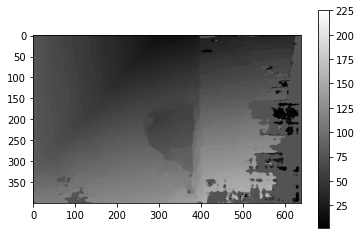

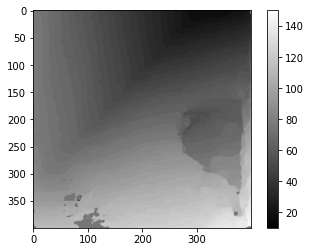

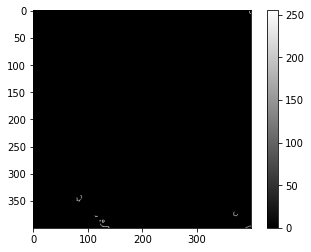

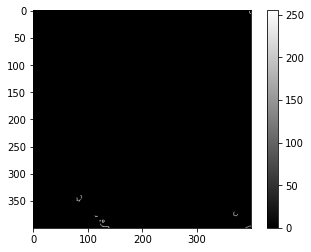

In [13]:
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
disp = disparity[:,0:400]
plt.imshow(disp, "gray")
plt.colorbar()
plt.show()
disp_edge = cv2.Canny(disp, 170, 250)
# cv2.imshow("edged", edged)
plt.imshow(disp_edge, "gray")
plt.colorbar()
plt.show()
contours, hierarchy = cv2.findContours(disp_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
# cv2.imshow('Canny Edges After Contouring', disp_edge)
plt.imshow(disp_edge, "gray")
plt.colorbar()
plt.show()
# print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
# cv2.drawContours(disp, contours, -1, (0, 0,255), 2)
# cv2.imshow('Contours', disp)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(disp, "gray")
# plt.colorbar()
# plt.show()

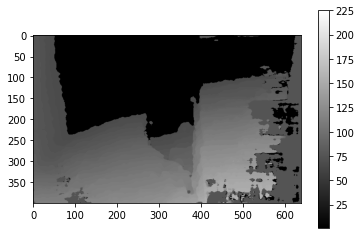

67


In [38]:
disp_M1 = np.copy(disparity)
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if(disp_M1[i][j]<150):
#             print("a")
            disp_M1[i][j] == (disparity[i][j])/2
        else:
            disp_M1[i][j] == disparity[i][j]*2
plt.imshow(disp_M1, "gray")
plt.colorbar()
plt.show()
print(disp_M1[250][300])

75.15315643487878


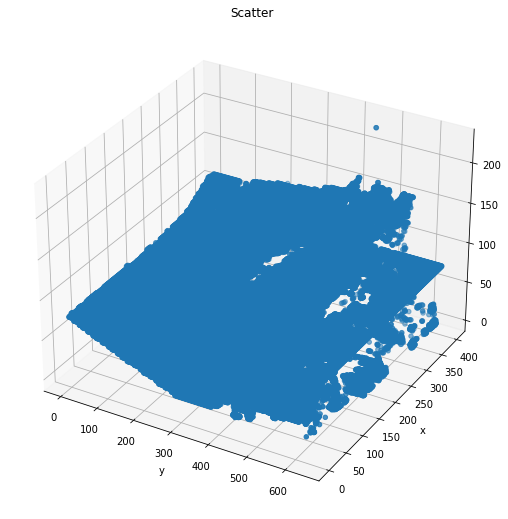

In [14]:
disparity1 = np.copy(disparity)
w=[]
h=[]
d=[]
for i in range(height1):
    for j in range(width1):
        w.append(i)
        h.append(j)
        if(disparity1[i][j]<avg_dis):
            disparity1[i][j]= avg_dis
        d.append(disparity[i][j])
print(avg_dis)
fig = plt.figure(figsize =(21, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.scatter(h,w , d)
plt.show()

[ 6.61377248e+01 -1.15224918e-02 -2.01725888e-01  2.86356803e-04
  4.89024813e-04  2.68957932e-04]


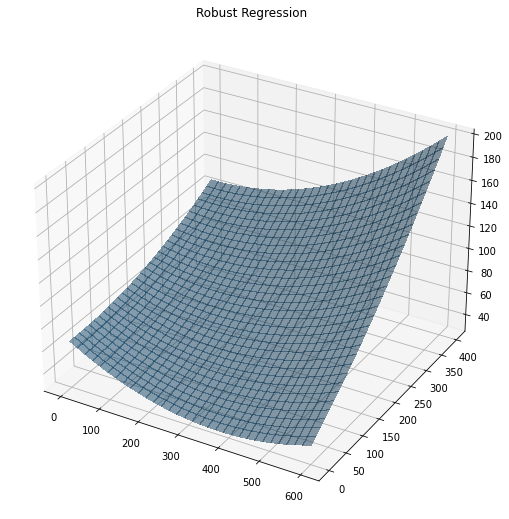

In [15]:
def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

x1 = np.linspace(0, 400, 32)

y1 = np.linspace(0, 600, 32)

xv, yv = np.meshgrid(x1, y1)
cfs = res_robust.x
print(cfs)
zv =fun_z(cfs, xv, yv)
z1 =zv.flatten()
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
# ax.scatter(h,w,d)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()


32
32
640
400


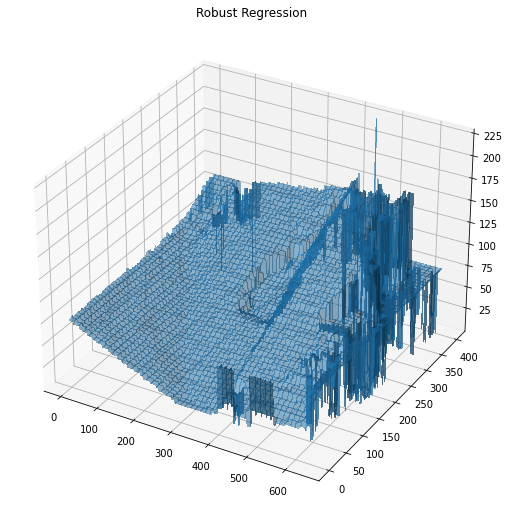

110
[81.51971053]


In [16]:
print(xv.shape[0])
print(xv.shape[1])
print(width1)
print(height1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
w1 =np.reshape(w,(height1,width1))
h1 =np.reshape(h,(height1,width1))
# ax.scatter(xv,yv ,zv)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()
print(disparity[300][390])
print(fun_z(cfs , np.array([250]), np.array([300])))

-14.519710529989055


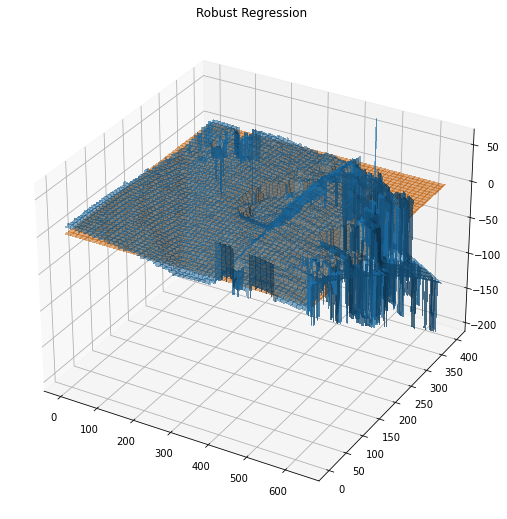

In [18]:
zv =fun_z(cfs, w1, h1)
diff =np.array(disparity) - np.array(zv)
print(diff[250][300])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

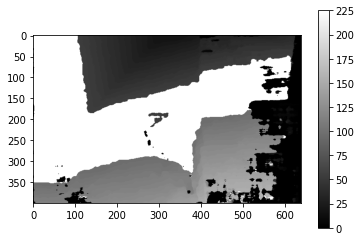

In [135]:
disparity12 = np.copy(disparity)
for i in range(height1):
    for j in range(width1):
        if(disparity[i][j]>66-12 and disparity[i][j]<66+28):
            disparity12[i][j]=225
plt.imshow(disparity12, "gray")
plt.colorbar()
plt.show()            
            

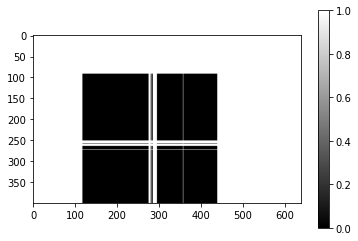

In [68]:
img_black = np.ones((height1,width1))
potholesSize = 0
potx =[]
poty = []
for j in range(0,height1):
    for i in range(0,width1):
#         iv, jv = np.meshgrid(i, j)
#         if(disparity[j][i] < fun_z(cfs, np.array([i]), np.array([j]))):
#             img_black[j][i] = 0
#         estimation = cfs(1)+yy*coefs(2)+xx*coefs(3)+xx*yy*coefs(4)+yy^2*coefs(5)+xx^2*coefs(6);
        estimation = fun_z(cfs, np.array([i]), np.array([j]))
        

        disparityGiven =disparity[j,i]

#         % Algorithm is more sensitive to the points closer to the camera
#         if(j!=30):
#             condition1 =(2*abs(math.exp(height1/(j-30)))+15*j/height1-10)
        condition1 =(2*abs(math.exp(height1/(j+75)))+j/40-10)
#         % Don't take into account outliers, points need to be sufficiently close
#         % to the road surface
        condition2 = (j*0.063+18)

#         % If the condition is satisfied, put current index into the array with
#         % pothole values
        if((disparityGiven - estimation)**2>condition1 and (disparityGiven - estimation)<0 and(disparityGiven - estimation)**2<condition2):
            potholesSize=potholesSize+1
#             potholes(potholesSize,:)=realPoints(ii,:);
            potx.append(i)
            poty.append(j)
for j in poty:
    for i in potx:
#         if i in potx and j in poty:
        img_black[j][i]=0
plt.imshow(img_black , 'gray')
plt.colorbar()
plt.show()

In [ ]:
sum_means = 0
sum_y = 0
sum_n_xy = 0
sum_d_xx = 0


# means = zeros(,2);
means = np.zeros((coeff,2))

for ii = 1:gridRows

    sum = 0;
    sum_cent = 0;
    zero_cent = 0;
    zero_counter= 0;
    cent_count = 0;

    for jj = 1:gridCollumns

        % Current index in a grid
        index= (ii-1)*gridCollumns+jj;

        % Sum over all element in the row
        sum =sum+grid(index,1);

        % Current value is in the center of the row
        if (abs(gridCollumns/2 - jj)<gridCollumns/4)

            % Sum all disparity values in a row
            sum_cent = sum_cent+grid(index,1);

            % If the disparity value of the current pixel is missing 
            if (grid(index,1)<=0)
                zero_cent = zero_cent+1;
            else
                cent_count = cent_count+1;
            end

        end

        % If current element is 0 increment 0 counter
        if (grid(index,1)<=0)
            zero_counter = zero_counter+1;
        end
    end



    mean_cent = (sum_cent)/(cent_count);
    mean_side = (sum-sum_cent)/(gridCollumns-cent_count-zero_counter);
    mean = sum /(gridCollumns-zero_counter);

    for jj = 1:gridCollumns
        index= (ii-1)*gridCollumns+jj;
        factor = abs(grid(index,1)-mean)/mean;

        % If current value significantly deviates from the mean
        if factor > 0.15

            % If current value is in the centre
            if (abs(gridCollumns/2 - jj)<gridCollumns/4)

                % If mean of the central part is very different from
                % the normal mean
                if (abs(mean_cent -  mean)/mean>0.075)
                    grid(index,1) = mean - (mean-mean_side)/2;
                else
                    grid(index,1) = mean_cent;
                end

            % If current value is on the side of the grid
            else
                % If mean of the central part is very different from
                % the normal mean
                if (abs(mean_side -  mean)/mean>0.05)
                    grid(index,1) = mean - (mean-mean_cent)/2;

                else
                    grid(index,1) = mean_side;
                end
            end
        end
    end
    means(ii,1)  = mean;
    means (ii,2)= grid((ii-1)*gridCollumns+1,2);
    sum_d_xx = grid((ii-1)*gridCollumns+1,2)^2;
    sum_n_xy =  mean*grid((ii-1)*gridCollumns+1,2);
    sum_means = sum_means+mean;
    sum_y  = grid((ii-1)*gridCollumns+1,2)+sum_y;
end

sum_means = sum_means/gridRows;
sum_y = sum_y/gridRows;
bLS = (sum_n_xy - gridRows*sum_y*sum_means)/(sum_d_xx-gridRows*sum_y*sum_y);
aLS = sum_means-bLS*sum_y;

% Assuming that the disparity is linearly decreasing with an object
% being further away from the camera, calibrate values of every row
% which deviate significantly from the prediction
for ii = 1:gridRows
    ind = (means(ii,1)-(aLS+bLS*means(ii,2)))/means(ii,1);
    if (ind>0.035) 
        for jj = 1:gridCollumns
            index= (ii-1)*gridCollumns+jj;
            grid (index,1)= grid(index,1)*(1-ind);
        end
    end
end
end

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.10288e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()
[[-2.56141210e-02 -3.83834956e-01  6.35363523e-02  1.67123324e-03
   3.50945740e-07  1.61786757e-04]]


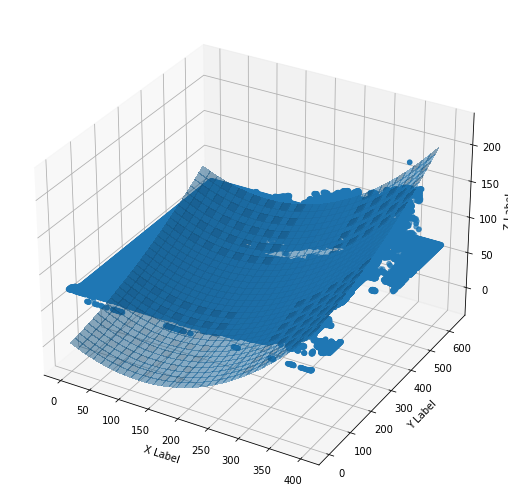

In [28]:
# print(d)
w = np.array(w, dtype=np.float64)
h = np.array(h, dtype=np.float64)
d = np.array(d, dtype=np.float64)
sx1=0
SMx =[]
sy1=0
SMy =[]
sy2=0
SMy2 =[]
sx2=0
SMx2 =[]
sx3=0
SMx3 =[]
sxy=0
SMxy =[]
sx2y=0
SMx2y =[]
sxy2=0
SMxy2 =[]
sy3=0
SMy3 =[]
sx4 = 0
SMx4=[]
sy4 = 0
SMy4=[]
sx3y = 0
SMx3y=[]
sx3y2 = 0
SMx3y2=[]
sx2y2=0
SMx2y2 =[]
sxy3=0
SMxy3 =[]
sz1=0
SMz1 =[]
sxz=0
SMxz =[]
szy=0
SMzy =[]
sx2z=0
SMx2z =[]
sxyz =0
SMxyz = []
sy2z=0
SMy2z =[]
sz1=0
SMz=[]
s=0
for i in range(len(w)):
    s= s+i
    sx1 = sx1 + w[i]
    SMx.append(sx1)
    sy1 = sy1 + h[i]
    SMy.append(sy1)
    sx2 = sx2+ w[i]**2
    SMx2.append(sx2)
    sy2 = sy2 + h[i]**2
    SMy2.append(sy2)
    sxy = sxy + w[i]*h[i]
    SMxy.append(sxy)
    sx3 = sx3+ w[i]**3
    SMx3.append(sx3)
    sx2y = sx2y+ (w[i]**2)*(h[i])
    SMx2y.append(sx2y)
    sxy2 = sxy2 + (w[i])*(h[i]**2)
    SMxy2.append(sxy2)
    sy3 = sy3 + h[i]**3
    SMy3.append(sy3)
    sx4 = sx4 + w[i]**4
    SMx4.append(sx4)
    sy4 = sy4 + h[i]**4
    SMy4.append(sy4)
    sx3y2 = sx3y2 +(w[i]**3)*(h[i]**2)
    SMx3y2.append(sx3y2)
    sx3y = sx3y + (w[i]**3)*(h[i])
    SMx3y2.append(sx3y)
    sx2y2 = sx2y2 + (w[i]**2)*(h[i]**2)
    SMx2y2.append(sx2y2)
    sxy3 = sxy3 + (w[i])*(h[i]**3)
    SMxy3.append(sxy3)
    sz1 = sz1 + d[i]
    SMz.append(sz1)
    sxz = sxz + w[i]*d[i]
    SMxz.append(sxz)
    szy = szy + d[i]*h[i]
    SMzy.append(szy)
    sx2z = sx2z + (w[i]**2)*(d[i])
    SMx2z.append(sx2z)
    sxyz = sxyz + (w[i])*(h[i])*(d[i])
#     print(sxyz)
    SMxyz.append(sxyz)
    sy2z = sy2z + (h[i]**2)*(d[i])
    SMy2z.append(sy2z)
#plot using ridge regression
reg2 = linear_model.Ridge()
reg2.fit([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]], [[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])
print(reg2)
amat1=reg2.coef_
# reg1.intercept_
print(amat1)
x1 = np.outer(np.linspace(0, 400, 32), np.ones(32))
y1 = np.outer(np.linspace(0, 600, 32), np.ones(32))
z1 = amat1[0,0]+ amat1[0,1]*x1 + amat1[0,2]*y1 +  amat1[0,3]*x1*x1 + amat1[0,4]*x1*y1 + amat1[0,5]*y1*y1

# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# my_cmap = plt.get_cmap('hot')
# # ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Ridge Regression')
# ax.plot_surface(x1,y1,z1,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# # ax.scatter(x, y, d)
# surf3 = ax.plot_surface(x1, y1, z1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
# fig.colorbar(surf3, shrink=0.5, aspect=5)
# plt.show()

fig = plt.figure(figsize =(14, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, y1)
zs = amat1[0,0]+ amat1[0,1]*X + amat1[0,2]*Y +  amat1[0,3]*X*X + amat1[0,4]*X*Y + amat1[0,5]*Y*Y
Z = zs.reshape(X.shape)
ax.scatter(w, h, d)
ax.plot_surface(X,Y, Z,linewidth=0, antialiased=False, shade = True, alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [34]:
huber = HuberRegressor().fit([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]], [[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])
huber.score([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]], [[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])
#huber.predict(X[:1,])
# #linear = LinearRegression().fit(X, y)
# print("True coefficients:", coef)
print("Huber coefficients:", huber.coef_)
# print("Linear Regression coefficients:", linear.coef_)
amat3=huber.coef_
# reg1.intercept_
x1 = np.outer(np.linspace(0, 400, 32), np.ones(32))
y1 = np.outer(np.linspace(0, 600, 32), np.ones(32))
# z1 = amat1[0,0]+ amat1[0,1]*x1 + amat1[0,2]*y1 +  amat1[0,3]*x1*x1 + amat1[0,4]*x1*y1 + amat1[0,5]*y1*y1

# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# my_cmap = plt.get_cmap('hot')
# # ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Ridge Regression')
# ax.plot_surface(x1,y1,z1,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# # ax.scatter(x, y, d)
# surf3 = ax.plot_surface(x1, y1, z1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
# fig.colorbar(surf3, shrink=0.5, aspect=5)
# plt.show()

fig = plt.figure(figsize =(14, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, y1)
zs = amat3[0,0]+ amat3[0,1]*X + amat3[0,2]*Y +  amat3[0,3]*X*X + amat3[0,4]*X*Y + amat3[0,5]*Y*Y
Z = zs.reshape(X.shape)
ax.scatter(w, h, d)
ax.plot_surface(X,Y, Z,linewidth=0, antialiased=False, shade = True, alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: HuberRegressor convergence failed: l-BFGS-b solver terminated with ABNORMAL_TERMINATION_IN_LNSRCH

In [15]:
img_black = np.ones((height1,width1))
for j in range(height1):
    for i in range(width1):
        zi =  amat1[0,0]+ amat1[0,1]*i + amat1[0,2]*j +  amat1[0,3]*i*i + amat1[0,4]*i*j + amat1[0,5]*j*j
        if(disparity[j][i] < fun_z(cfs, iv, jv)):
            img_black[j][i] = 0
plt.imshow(img_black , 'gray')
plt.colorbar()
plt.show()

NameError: name 'amat1' is not defined